# Deep Learning with H2O - Tutorial 1: MNIST Handwritten Digits Classification

<hr>

**Objective**:

- This tutorial demonstrates the basic usage of the classic H2O deep learning algorithm.

<hr>

**MNIST Dataset (Kaggle Version):**

- https://www.kaggle.com/c/digit-recognizer/data

<hr>
    
**Methods**:

1. xxx
2. xx

<hr>

**Full Technical Reference:**

- http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/deep-learning.html
- https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/dl/dlperf.Rmd

<br>

<br>

## Start and Connect to a Local H2O Cluster

In [2]:
# Load R Packages
suppressPackageStartupMessages(library(h2o))

In [3]:
# Start and connect to a local H2O cluster
h2o.init(nthreads = -1)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpQVK0SQ/h2o_joe_started_from_r.out
    /tmp/RtmpQVK0SQ/h2o_joe_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 227 milliseconds 
    H2O cluster version:        3.10.3.5 
    H2O cluster version age:    9 days  
    H2O cluster name:           H2O_started_from_R_joe_dba557 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   5.21 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.2 (2016-10-31) 



<br>

## Basic Exploratory Analysis

In [4]:
# Import Kaggle MNIST (train)
h_mnist <- h2o.importFile("./data/kaggle_mnist_train.csv")

  |======================================================================| 100%


In [5]:
# Quick summary
h2o.describe(h_mnist$label)

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
label,int,0,4132,0,0,0,9,4.45664285714286,2.88773014184163,NA


In [6]:
# Quick Count
head(h2o.table(h_mnist$label), 10)

label,Count
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063
9,4188


## Basic Data Transformation

In [7]:
# Convert label from numerical values to categorical values
h_mnist$label <- as.factor(h_mnist$label)

<br>

## Define Target and Features

In [8]:
# Define target (y) and features (x)
target <- "label" 
features <- setdiff(colnames(h_mnist), target)
print(features)

  [1] "pixel0"   "pixel1"   "pixel2"   "pixel3"   "pixel4"   "pixel5"  
  [7] "pixel6"   "pixel7"   "pixel8"   "pixel9"   "pixel10"  "pixel11" 
 [13] "pixel12"  "pixel13"  "pixel14"  "pixel15"  "pixel16"  "pixel17" 
 [19] "pixel18"  "pixel19"  "pixel20"  "pixel21"  "pixel22"  "pixel23" 
 [25] "pixel24"  "pixel25"  "pixel26"  "pixel27"  "pixel28"  "pixel29" 
 [31] "pixel30"  "pixel31"  "pixel32"  "pixel33"  "pixel34"  "pixel35" 
 [37] "pixel36"  "pixel37"  "pixel38"  "pixel39"  "pixel40"  "pixel41" 
 [43] "pixel42"  "pixel43"  "pixel44"  "pixel45"  "pixel46"  "pixel47" 
 [49] "pixel48"  "pixel49"  "pixel50"  "pixel51"  "pixel52"  "pixel53" 
 [55] "pixel54"  "pixel55"  "pixel56"  "pixel57"  "pixel58"  "pixel59" 
 [61] "pixel60"  "pixel61"  "pixel62"  "pixel63"  "pixel64"  "pixel65" 
 [67] "pixel66"  "pixel67"  "pixel68"  "pixel69"  "pixel70"  "pixel71" 
 [73] "pixel72"  "pixel73"  "pixel74"  "pixel75"  "pixel76"  "pixel77" 
 [79] "pixel78"  "pixel79"  "pixel80"  "pixel81"  "pixel82"  "pi

In [9]:
# Custom function to visualise digit
show_digit <- function(h_frame, features) {
  
  # Convert to normal R data frame
  d <- as.data.frame(h_frame[, features])
  
  # Reshape
  m <- matrix(data = as.numeric(d), nrow = 28, ncol = 28, byrow = TRUE)
  rotate <- function(x) t(apply(x, 2, rev))
  m <- rotate(m)
  
  # Show image
  image(m, axes = FALSE, col = grey(seq(0, 1, length = 256)))

}

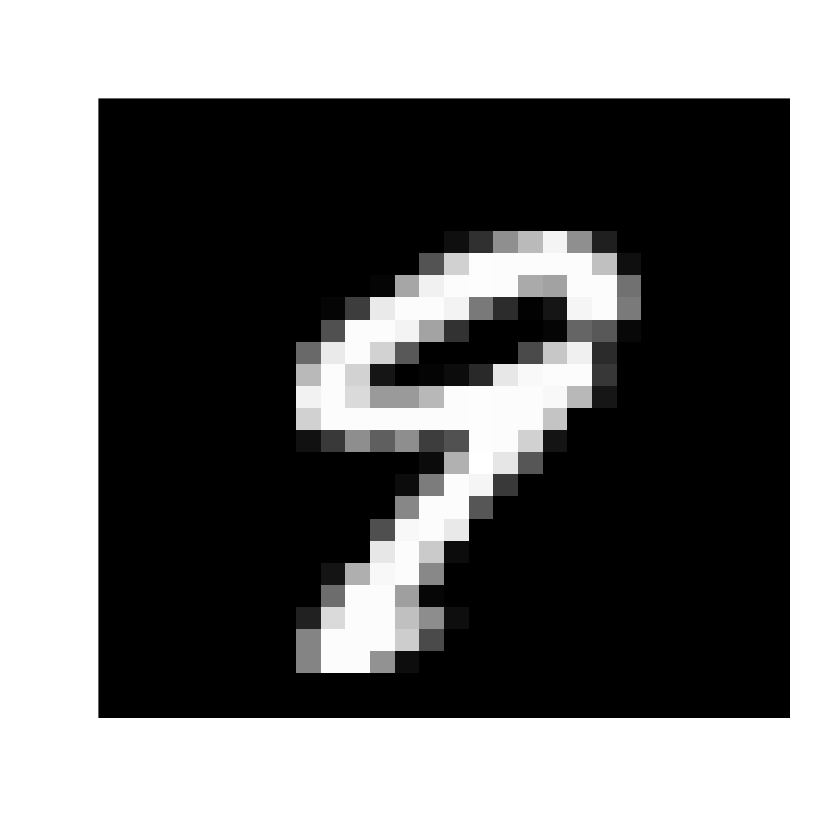

In [10]:
# Test (not run)
set.seed(1234)
show_digit(h_mnist[sample(1:100,1),], features)

<br>

## Split Dataset for Training and Out-of-Bag Evaluation

In [11]:
# Split dataset into train/test
h_split <- h2o.splitFrame(h_mnist, ratios = 0.8, seed = 1234)
h_train <- h_split[[1]]
h_test <- h_split[[2]]

In [12]:
dim(h_train)
head(h2o.table(h_train$label), 10)

[1] 33689   785

label,Count
0,3293
1,3754
2,3370
3,3481
4,3266
5,3064
6,3306
7,3517
8,3274
9,3364


In [13]:
dim(h_test)
head(h2o.table(h_test$label), 10)

[1] 8311  785

label,Count
0,839
1,930
2,807
3,870
4,806
5,731
6,831
7,884
8,789
9,824


<br>

## Find Out All Availalbe Options

In [14]:
# Check out parameters for h2o.deeplearning
# ?h2o.deeplearning

<br>

## H2O Deep Learning Model - Basic Usage

In [15]:
# DL with manual settings
model_manual <- h2o.deeplearning(x = features,
                                 y = target,
                                 training_frame = h_train,
                                 activation = "Rectifier",
                                 hidden = c(200, 200),
                                 epochs = 20)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Dropping constant columns: [pixel729, pixel644, pixel645, pixel448, pixel727, pixel728, pixel560, pixel52, pixel760, pixel10, pixel54, pixel53, pixel168, pixel56, pixel11, pixel55, pixel14, pixel57, pixel16, pixel15, pixel18, pixel17, pixel19, pixel754, pixel755, pixel756, pixel757, pixel758, pixel759, pixel83, pixel196, pixel82, pixel85, pixel671, pixel84, pixel111, pixel672, pixel112, pixel673, pixel113, pixel476, pixel392, pixel393, pixel700, pixel701, pixel141, pixel780, pixel30, pixel781, pixel782, pixel420, pixel783, pixel31, pixel421, pixel224, pixel588, pixel140, pixel699, pixel139, pixel8, pixel9, pixel616, pixel6, pixel7, pixel4, pixel5, pixel2, pixel3, pixel0, pixel21, pixel1, pixel20, pixel23, pixel532, pixel730, pixel22, pixel731, pixel25, pixel24, pixel27, pixel26, pixel29, pixel28].
”

  |======================================================================| 100%


In [16]:
# Evaluate model performance on test data
h2o.performance(model_manual, newdata = h_test)

H2OMultinomialMetrics: deeplearning

Test Set Metrics: 

MSE: (Extract with `h2o.mse`) 0.02504152
RMSE: (Extract with `h2o.rmse`) 0.1582451
Logloss: (Extract with `h2o.logloss`) 0.2727759
Mean Per-Class Error: 0.02789048
Confusion Matrix: Extract with `h2o.confusionMatrix(<model>, <data>)`)
Confusion Matrix: vertical: actual; across: predicted
         0   1   2   3   4   5   6   7   8   9  Error          Rate
0      828   0   2   0   0   2   1   0   4   2 0.0131 =    11 / 839
1        1 915   1   4   2   1   2   3   1   0 0.0161 =    15 / 930
2        3   6 777   8   0   0   1   7   3   2 0.0372 =    30 / 807
3        0   2  10 842   0  10   0   1   4   1 0.0322 =    28 / 870
4        0   1   5   0 787   0   3   1   2   7 0.0236 =    19 / 806
5        1   1   3   3   0 713   5   1   2   2 0.0246 =    18 / 731
6        2   4   1   0   1   7 813   0   3   0 0.0217 =    18 / 831
7        0   3   9   2   2   1   0 858   0   9 0.0294 =    26 / 884
8        3   4   3   9   0  11   3   2 749

<br>

<br>

## Make Predictions

In [17]:
# Make predictions
yhat_test <- h2o.predict(model_manual, newdata = h_test)

  |======================================================================| 100%


Ground Truth:  3 
Model Prediction: 
  predict           p0           p1           p2 p3           p4           p5
1       3 1.462465e-44 5.160512e-30 7.425895e-34  1 1.414433e-47 2.885587e-29
            p6           p7           p8           p9
1 3.999086e-50 7.065346e-56 7.759887e-50 1.363194e-40

[1 row x 11 columns] 



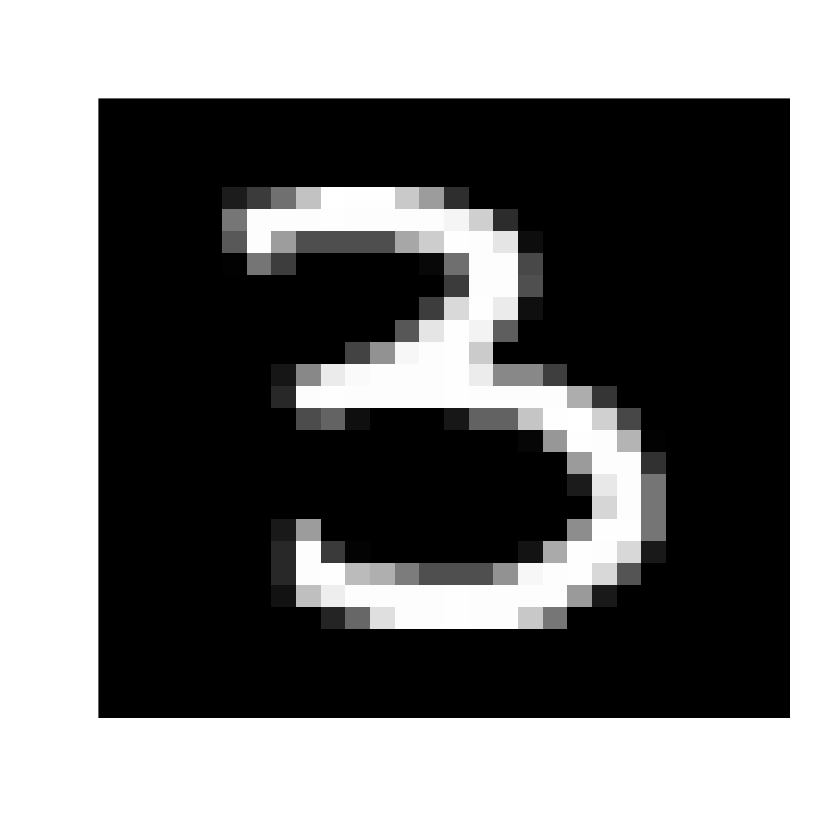

Ground Truth:  9 
Model Prediction: 
  predict           p0           p1           p2           p3           p4
1       9 1.563944e-30 1.315056e-31 1.247531e-25 2.133485e-21 1.506872e-12
            p5           p6           p7          p8 p9
1 3.924451e-16 6.536777e-22 1.126197e-16 7.49779e-18  1

[1 row x 11 columns] 



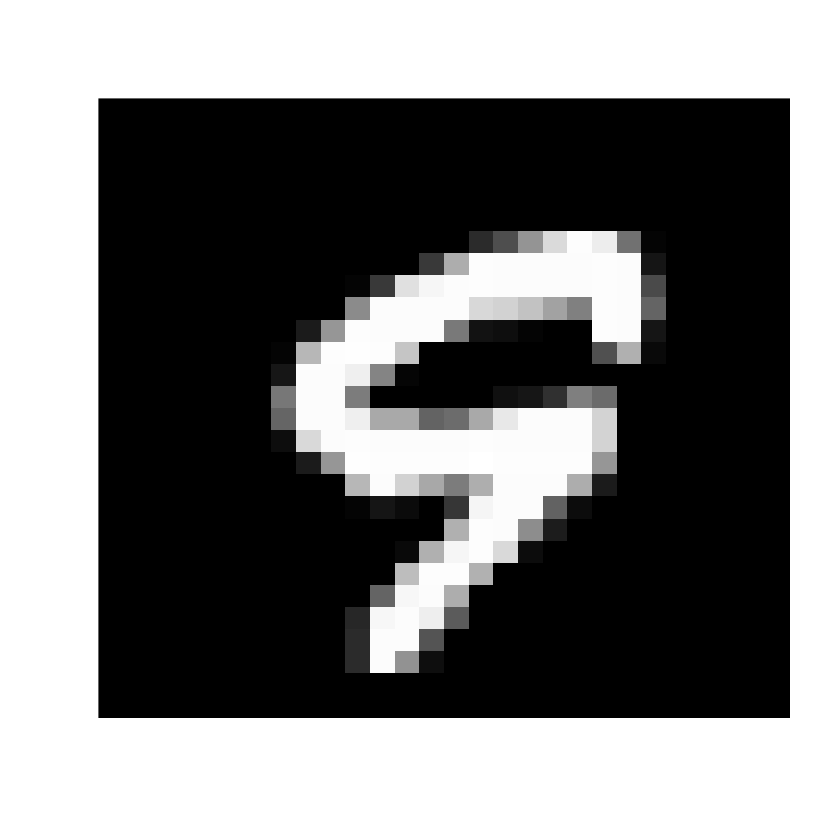

Ground Truth:  4 
Model Prediction: 
  predict           p0           p1           p2           p3        p4
1       4 5.897616e-30 1.003492e-11 1.001204e-21 6.767871e-13 0.9999997
            p5           p6           p7           p8           p9
1 3.016641e-25 2.702509e-22 5.588275e-17 1.774936e-16 2.893608e-07

[1 row x 11 columns] 



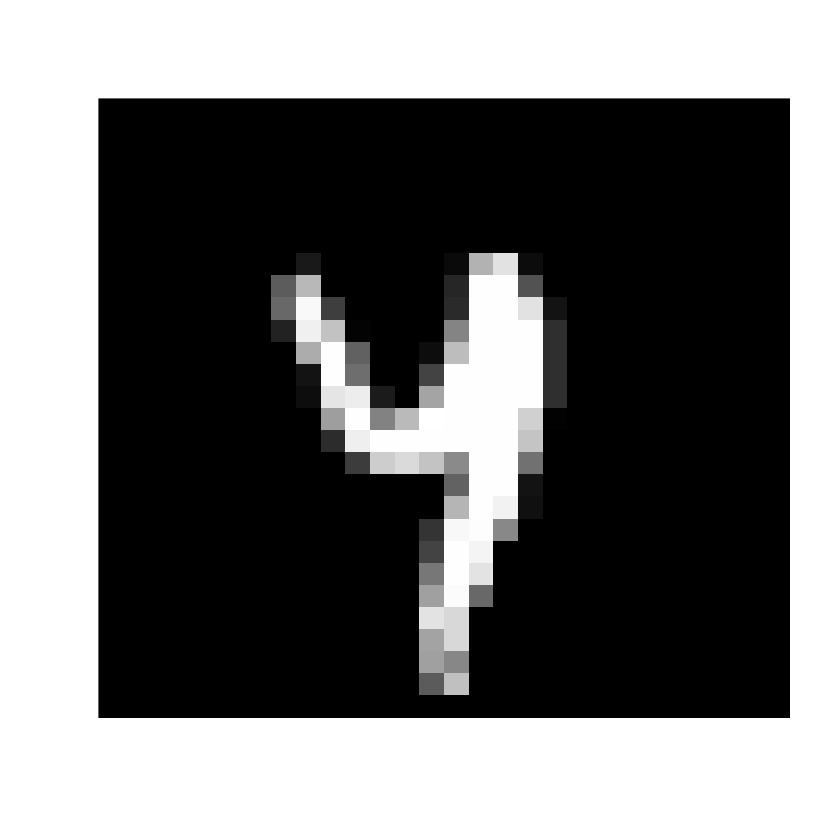

Ground Truth:  0 
Model Prediction: 
  predict p0           p1           p2           p3           p4           p5
1       0  1 8.490207e-50 1.241727e-33 3.800144e-32 7.362621e-28 1.752471e-28
            p6          p7           p8           p9
1 8.622132e-17 2.23848e-22 3.654657e-36 3.744915e-24

[1 row x 11 columns] 



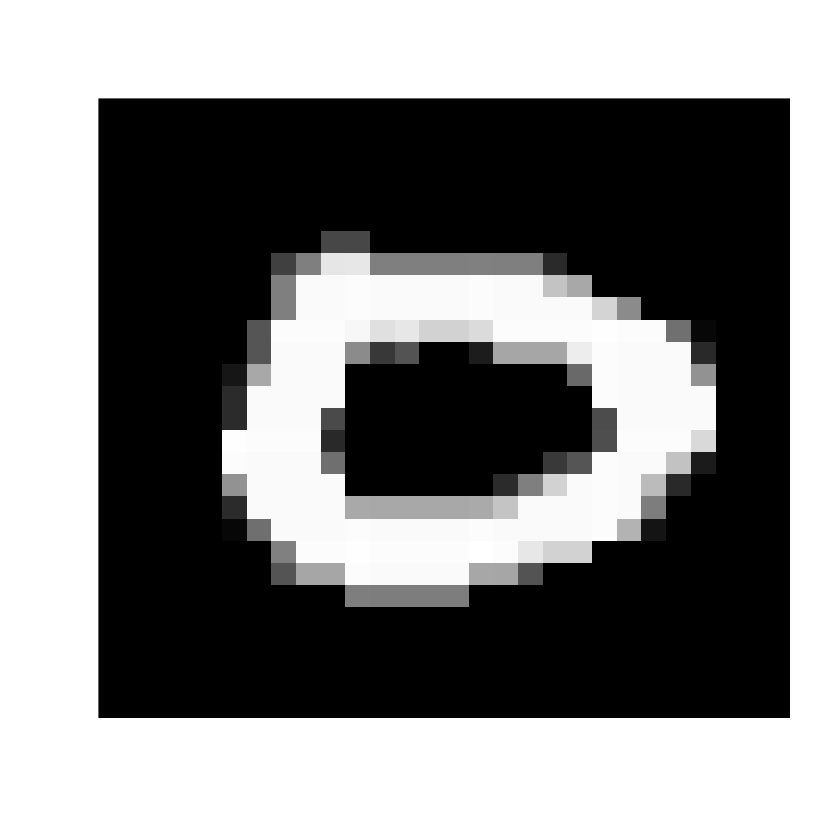

Ground Truth:  4 
Model Prediction: 
  predict           p0           p1           p2          p3 p4          p5
1       4 4.154034e-22 2.202065e-28 2.644369e-18 3.47144e-24  1 2.31908e-22
            p6           p7           p8           p9
1 1.036221e-14 3.284184e-12 1.329353e-21 3.726764e-09

[1 row x 11 columns] 



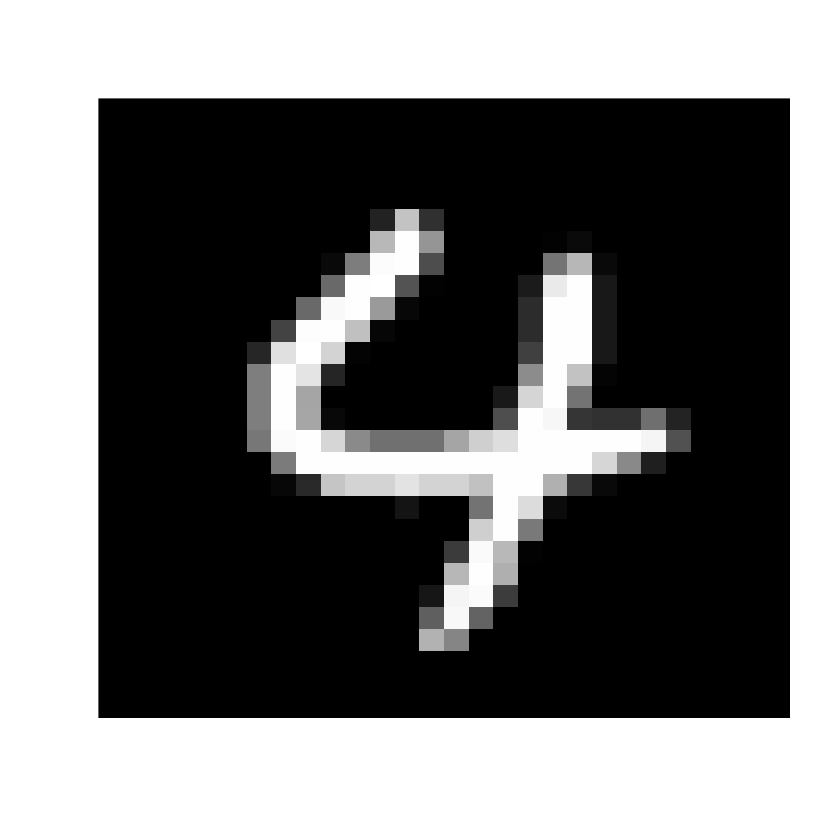

In [18]:
# Check some of the results visually
set.seed(1234)
for (n in 1:5) {
  
  # Random sample
  n_samp_row <- sample(1:nrow(h_test), 1)
  
  # Show the digit
  show_digit(h_test[n_samp_row,], features)
  
  # Show ground truth
  cat("Ground Truth: ", as.character(h_test[n_samp_row, "label"]), "\n")
  
  # Show predictions
  cat("Model Prediction: \n")
  print(yhat_test[n_samp_row, ])
  cat("\n")
  
}

## Build a Reproducible Classic H2O Deep Learning Model

<br>

In [19]:
# DL with reproducible = TRUE and seed
# Note 1: using one CPU thread only. Can be very slow.
# Note 2: using a small network (50, 50) and one epoch for demo only.
model_repro <- h2o.deeplearning(x = features,
                                y = target,
                                training_frame = h_train,
                                hidden = c(50, 50),
                                epochs = 1,
                                reproducible = TRUE,
                                seed = 1234)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Dropping constant columns: [pixel729, pixel644, pixel645, pixel448, pixel727, pixel728, pixel560, pixel52, pixel760, pixel10, pixel54, pixel53, pixel168, pixel56, pixel11, pixel55, pixel14, pixel57, pixel16, pixel15, pixel18, pixel17, pixel19, pixel754, pixel755, pixel756, pixel757, pixel758, pixel759, pixel83, pixel196, pixel82, pixel85, pixel671, pixel84, pixel111, pixel672, pixel112, pixel673, pixel113, pixel476, pixel392, pixel393, pixel700, pixel701, pixel141, pixel780, pixel30, pixel781, pixel782, pixel420, pixel783, pixel31, pixel421, pixel224, pixel588, pixel140, pixel699, pixel139, pixel8, pixel9, pixel616, pixel6, pixel7, pixel4, pixel5, pixel2, pixel3, pixel0, pixel21, pixel1, pixel20, pixel23, pixel532, pixel730, pixel22, pixel731, pixel25, pixel24, pixel27, pixel26, pixel29, pixel28].
”

  |======================================================================| 100%


In [20]:
# Evaluate
h2o.performance(model_repro, newdata = h_test)

H2OMultinomialMetrics: deeplearning

Test Set Metrics: 

MSE: (Extract with `h2o.mse`) 0.05542939
RMSE: (Extract with `h2o.rmse`) 0.2354345
Logloss: (Extract with `h2o.logloss`) 0.2787309
Mean Per-Class Error: 0.06350021
Confusion Matrix: Extract with `h2o.confusionMatrix(<model>, <data>)`)
Confusion Matrix: vertical: actual; across: predicted
         0   1   2   3   4   5   6   7   8   9  Error          Rate
0      821   0   1   1   2   6   3   0   2   3 0.0215 =    18 / 839
1        0 905   4   8   2   2   1   3   1   4 0.0269 =    25 / 930
2        4  15 729  22   6   3   8  11   7   2 0.0967 =    78 / 807
3        3   0  14 814   0  19   1   9   4   6 0.0644 =    56 / 870
4        0   1   2   1 767   3   6   5   4  17 0.0484 =    39 / 806
5        9   0   3  12   2 689   3   2   6   5 0.0575 =    42 / 731
6        8   3   3   1   6  15 789   1   5   0 0.0505 =    42 / 831
7        2   4  14   7   5   2   0 838   0  12 0.0520 =    46 / 884
8        5   9   5  30   2  21   4   3 699